1.3.1 Задание
Задача:
Задайте 4 точки в трехмерном пространстве, рассчитайте между ними
расстояния по описанным в примере выше метрикам. Отобразите точки
в трехмерном пространстве.


Координаты точек:  x y
Расстояние:  521.6253444762822 272093 889 347
Координаты точек:  x z
Расстояние:  628.1066788372816 394518 1040 497
Координаты точек:  x d
Расстояние:  930.7443257952208 866285 1119 920
Координаты точек:  y x
Расстояние:  521.6253444762822 272093 889 347
Координаты точек:  y z
Расстояние:  785.667232357313 617273 1235 598
Координаты точек:  y d
Расстояние:  688.0043604512983 473350 1102 573
Координаты точек:  z x
Расстояние:  628.1066788372816 394518 1040 497
Координаты точек:  z y
Расстояние:  785.667232357313 617273 1235 598
Координаты точек:  z d
Расстояние:  596.6313769824715 355969 979 423
Координаты точек:  d x
Расстояние:  930.7443257952208 866285 1119 920
Координаты точек:  d y
Расстояние:  688.0043604512983 473350 1102 573
Координаты точек:  d z
Расстояние:  596.6313769824715 355969 979 423


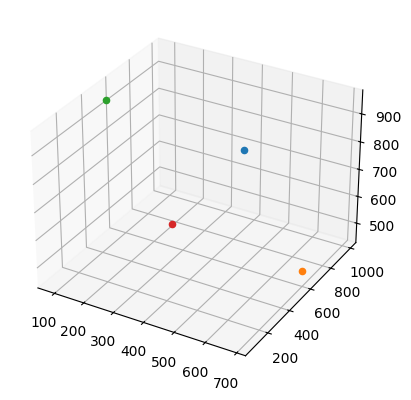

In [2]:
#Решение
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
rng = np.random.default_rng()
#Функции расстояния
def Euclid(m,n): 
    return sum((x-y)**2 for x, y in zip(m,n))**0.5
def EuclidKvadro(m,n):
    return sum((x-y)**2 for x, y in zip(m,n))
def Manhattan(m,n):
    return sum(abs(x-y) for x, y in zip(m,n))
def Chebyshev(m,n): 
    return max(abs(x-y) for x, y in zip(m,n))
fig = plt.figure()
#Создание точек
x = rng.integers(low =0, high =1000, size = 3)
y = rng.integers(low =0, high =1000, size = 3)
z = rng.integers(low =0, high =1000, size = 3)
d = rng.integers(low =0, high =1000, size = 3)
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x[0],x[1],x[2])
ax.scatter(y[0],y[1],y[2]) 
ax.scatter(z[0],z[1],z[2]) 
ax.scatter(d[0],d[1],d[2]) 
#Подсчет расстояния
array=[x,y,z,d]
array1=['x','y','z','d']
for i in range(4):
    for j in range(4):
        if(i!=j):
            print("Координаты точек: ",array1[i],array1[j])
            print("Расстояние: ",round(Euclid(array[i],array[j]),3),EuclidKvadro(array[i],array[j]), Manhattan(array[i],array[j]),Chebyshev(array[i],array[j]))
plt.show()

1.3.2 Задание
Задача:
Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания
необходимо использовать функцию arange.

In [3]:
#Решение
import numpy as np
x=np.ones((5,5))
x+=np.arange(5)
print(x)

[[1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]]


2.3.1 Задание
Задача:
Для предыдущего примера поэкспериментируйте с параметрами
классификатора:
1 Установите другое количество ближайших соседей (k = 1, 5, 10).
2 Установите размер тестовой выборки 15% от всего датасета.
3 Постройте графики и оцените качество моделей, проанализируйте
результаты.


accuracy: 0.957
accuracy: 0.957
accuracy: 1.0


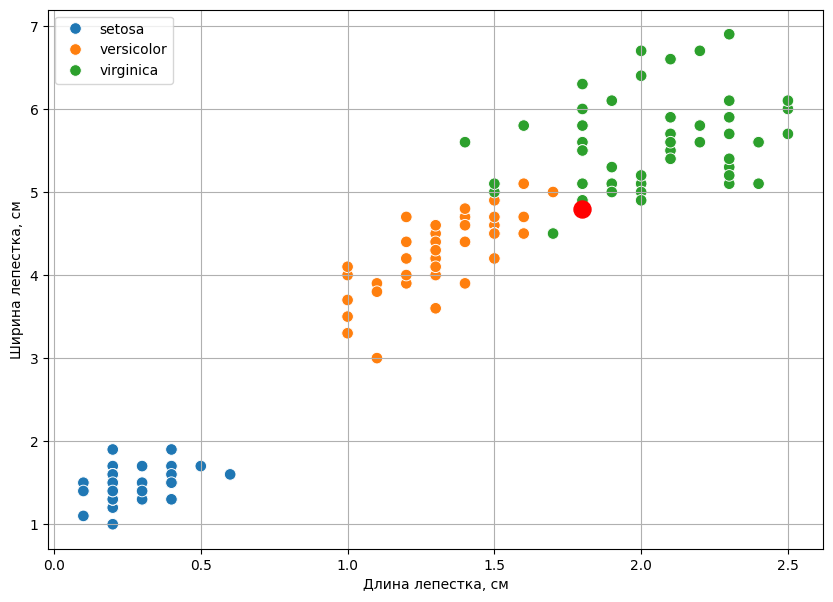

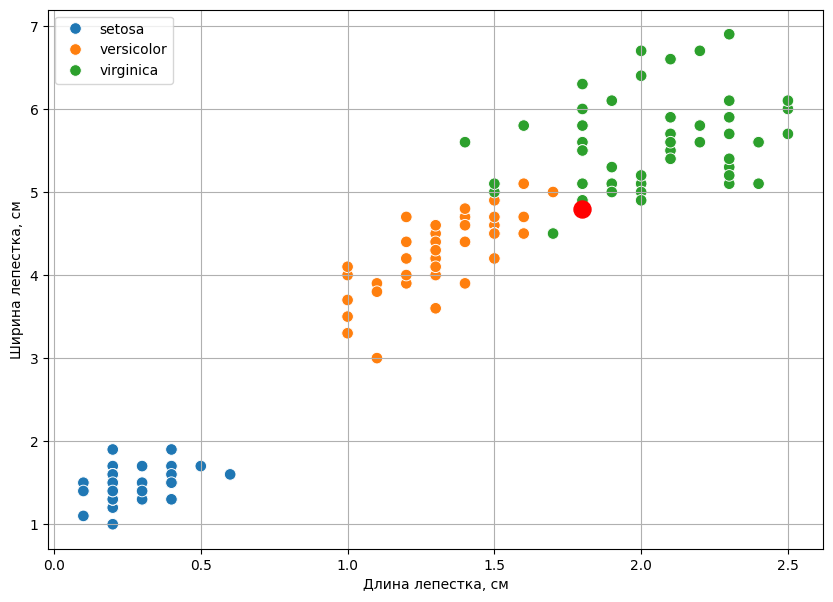

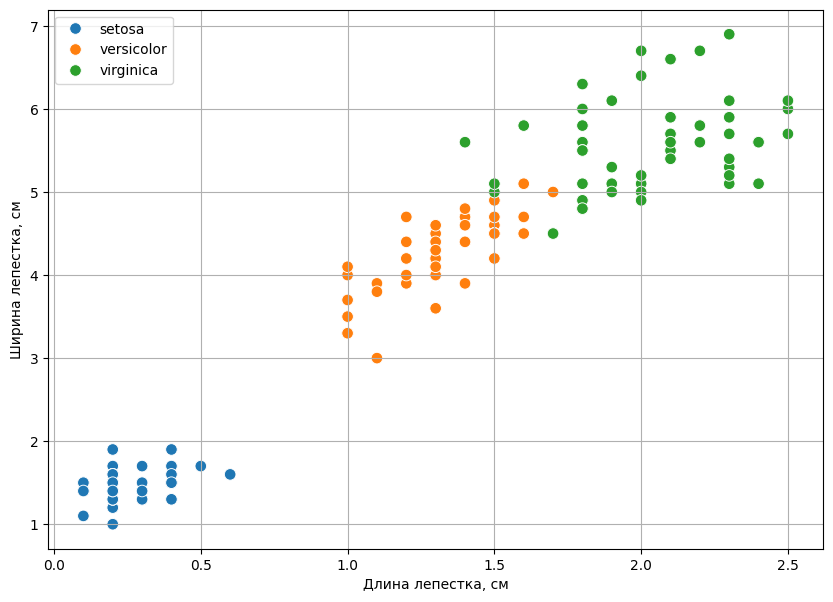

In [26]:
#Решение
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
iris = sns.load_dataset('iris')
X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:,:-1],  #признаки
    iris.iloc[:,-1], #Целевая
    test_size = 0.15 #Выборка
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train. head()
y_train.head()
for k in [1,5,10]: #Кол-во соседей
    model =KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pred
    # Покажем на графике, что отражает полученное число.
    # Красным цветом обозначены точки, для которых классификация сработала неправильно.
    plt.figure(figsize=(10, 7)) 
    sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
    plt.xlabel('Длина лепестка, см')
    plt.ylabel("Ширина лепестка, см")
    plt.legend(loc=2)
    plt.grid()
    # Перебираем все объекты из теста
    for i in range(len(y_test)):
    # Если предсказание неправильное
        if (np.array(y_test)[i] != y_pred[i]):
        # то подсвечиваем точку красным
            plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)
    print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')
#Таким образом, точность предсказаний зависит от выборки и количества соседей

3.3.2 Задание
Задача:
Определите набор признаков человека, по аналогии из РТ 1, – например,
цвет глаз и конвертируйте его в матрицу признаков.

In [10]:
#Решение
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
arr = [{'Карие':'м','Желтые':'ж'},
       {'Зеленые':'д','Голубые':'м'},
       {'Голубые':'д','Белые':'д'},
       {'Карие':'д','Желтые':'д'},
       ]
# Создать векторизатор словаря 
dictvectorizer = DictVectorizer(sparse=False)
# Конвертировать словарь в матрицу признаков
features = dictvectorizer.fit_transform(arr) 
features

array([[0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0.]])